### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Los ingresos totales de la tienda Tienda 1 son de $1,150,880,400.00
Los ingresos totales de la tienda Tienda 2 son de $1,116,343,500.00
Los ingresos totales de la tienda Tienda 3 son de $1,098,019,600.00
Los ingresos totales de la tienda Tienda 4 son de $1,038,375,700.00


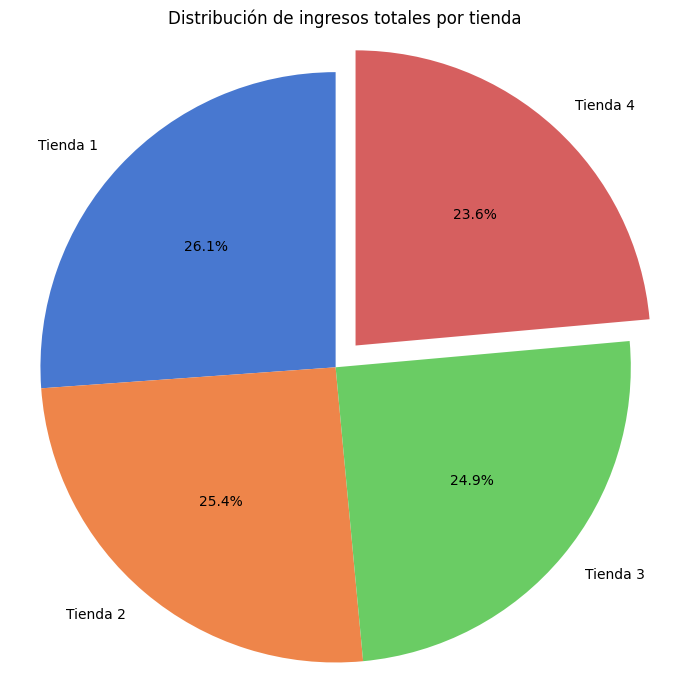

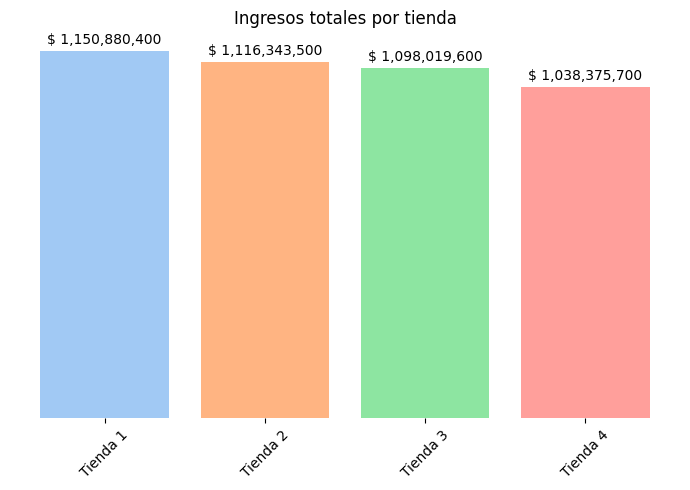

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Función para calcular ingresos totales por tienda
def ingreso_total(nombre_tienda, df):
  ingresos = float(df['Precio'].sum())
  print(f'Los ingresos totales de la tienda {nombre_tienda} son de ${ingresos:,.2f}')
  return nombre_tienda, ingresos

# Obtener los ingresos de las 4 tiendas
tiendas = [ ingreso_total('Tienda 1', tienda1),
            ingreso_total('Tienda 2', tienda2),
            ingreso_total('Tienda 3', tienda3),
            ingreso_total('Tienda 4', tienda4) ]

# Extraer nombres e ingresos
nombres = [nombre for nombre, ingreso in tiendas]
ingresos = [ingreso for nombre, ingreso in tiendas]

# Encontrar el menor ingreso para "extraerlo" en el gráfico de pastel
min_index = ingresos.index(min(ingresos))
explode = [0.1 if i == min_index else 0 for i in range(len(ingresos))]

#Gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(
    ingresos,
    labels=nombres,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("muted"),
    explode=explode
)
plt.title('Distribución de ingresos totales por tienda')
plt.axis('equal')
plt.tight_layout()
plt.show()

#Gráfico de barras
palette = sns.color_palette("pastel")
plt.figure(figsize=(7, 5))
plt.bar(nombres, ingresos, color=palette)
plt.title('Ingresos totales por tienda')
plt.xticks(rotation=45)

# Mostrar los valores sobre cada barra
for i, ingreso in enumerate(ingresos):
    plt.text(i, ingreso + max(ingresos)*0.01, f"$ {ingreso:,.0f}", ha='center', va='bottom')

sns.despine(left=True, bottom=True)
plt.yticks([])
plt.tight_layout()
plt.show()

# 2. Ventas por categoría


Las ventas totales de la Tienda 1 por categoría son:
Categoria                      Productos vendidos   Total $
Muebles                        465                  $187,633,700.00
Electrónicos                   448                  $429,493,500.00
Juguetes                       324                  $17,995,700.00
Electrodomésticos              312                  $363,685,200.00
Deportes y diversión           284                  $39,290,000.00
Instrumentos musicales         182                  $91,299,000.00
Libros                         173                  $8,784,900.00
Artículos para el hogar        171                  $12,698,400.00

Las ventas totales de la Tienda 2 por categoría son:
Categoria                      Productos vendidos   Total $
Muebles                        442                  $176,426,300.00
Electrónicos                   422                  $410,831,100.00
Juguetes                       313                  $15,945,400.00
Electrodomésticos              

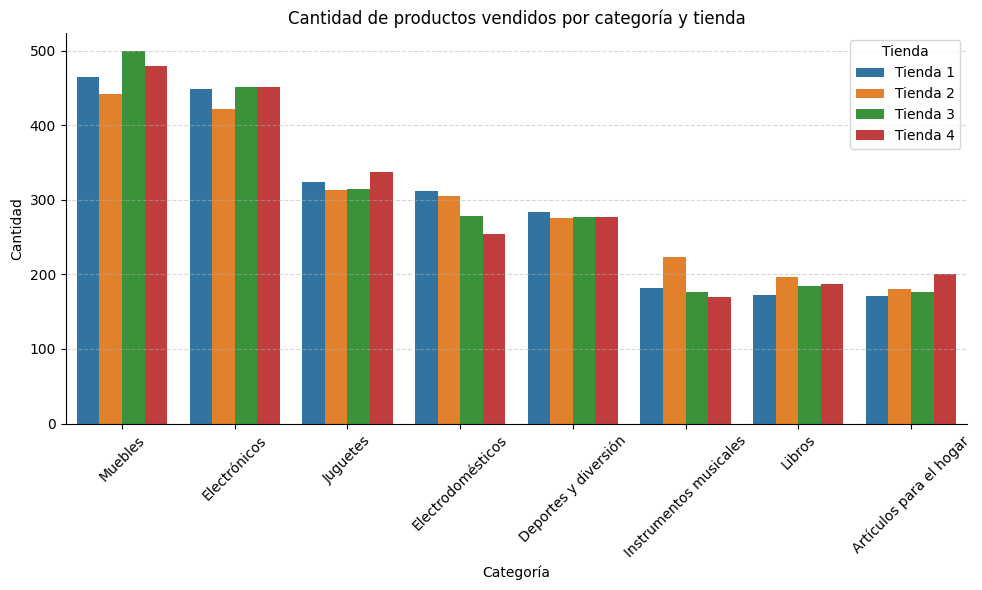

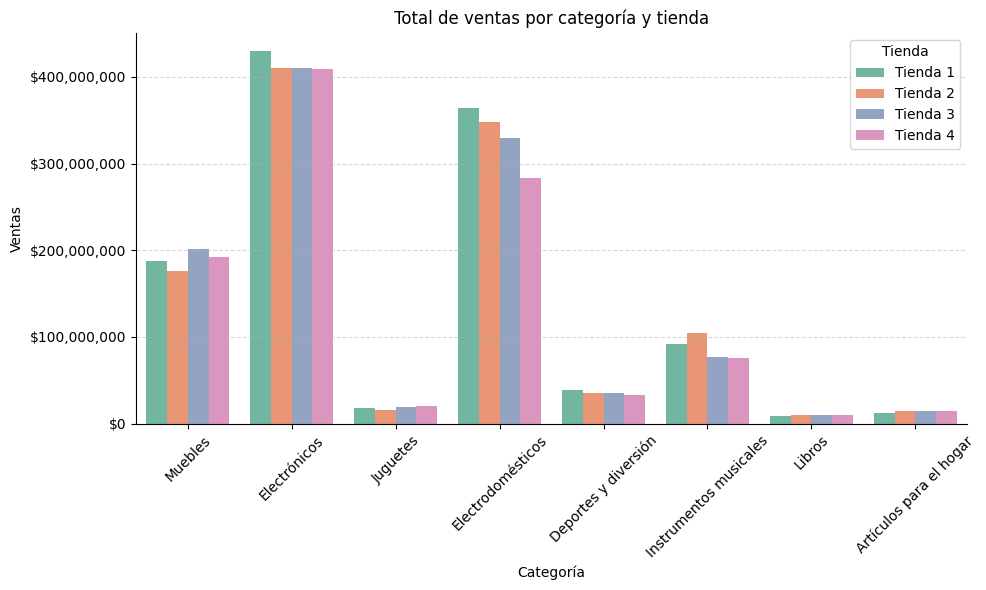

In [ ]:
def venta_categoria(nombre_tienda,df):
  # Obtener el número de productos vendidos por categoría
  conteo = df['Categoría del Producto'].value_counts()

  # Obtener el total de ventas por categoría
  venta = df.groupby('Categoría del Producto')['Precio'].sum()
  resultado = [('Categoria','Productos vendidos', 'Total $')]
  resultado += [ (categoria, int(conteo[categoria]), float(venta[categoria])) for categoria in conteo.index]

  # Imprimir resultados como tabla
  print(f'\nLas ventas totales de la {nombre_tienda} por categoría son:')
  print(f'{resultado[0][0]:<30} {resultado[0][1]:<20} {resultado[0][2]}')
  newconteo=0
  for categoria,contador,total in resultado[1:]:
    print(f'{categoria:<30} {contador:<20} ${total:,.2f}')
  return resultado

ventas_categorias = [venta_categoria('Tienda 1', tienda1),
                     venta_categoria('Tienda 2', tienda2),
                     venta_categoria('Tienda 3', tienda3),
                     venta_categoria('Tienda 4', tienda4)]

#Transformar datos para gráficas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
conteo_data, venta_data = [], []

for tienda, datos in zip(tiendas, ventas_categorias):
    for categoria, cantidad, total in datos[1:]:
        conteo_data.append({'Tienda': tienda, 'Categoría': categoria, 'Cantidad': cantidad})
        venta_data.append({'Tienda': tienda, 'Categoría': categoria, 'Ventas': total})

df_conteo = pd.DataFrame(conteo_data)
df_ventas = pd.DataFrame(venta_data)

#Cantidad de productos vendidos por categoría y tienda
plt.figure(figsize=(10, 6))
sns.barplot(data=df_conteo, x='Categoría', y='Cantidad', hue='Tienda', palette='tab10')
plt.title('Cantidad de productos vendidos por categoría y tienda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

#Total de ventas por categoría y tienda
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ventas, x='Categoría', y='Ventas', hue='Tienda', palette='Set2')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.title('Total de ventas por categoría y tienda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


El promedio de calificación de la Tienda 1 es: 3.977
El promedio de calificación de la Tienda 2 es: 4.037
El promedio de calificación de la Tienda 3 es: 4.048
El promedio de calificación de la Tienda 4 es: 3.996


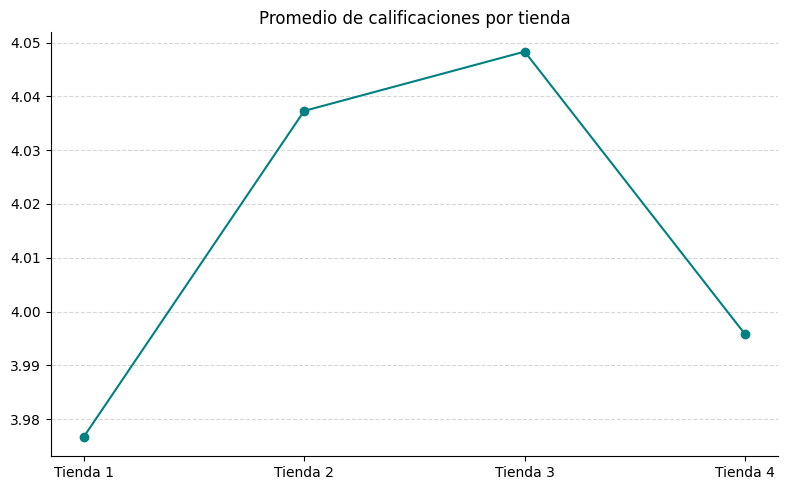

In [ ]:
def promedio_tienda(nombre_tienda,df):

  # Calcular el promedio de las calificaciones
  promedio = float(df['Calificación'].sum()/len(df['Calificación']))
  print(f'El promedio de calificación de la {nombre_tienda} es: {promedio:.3f}')
  return promedio

#Calcular el promedio de calificaciones para cada tienda y almacenarlo en una lista
promedios = [promedio_tienda('Tienda 1',tienda1),
             promedio_tienda('Tienda 2',tienda2),
             promedio_tienda('Tienda 3',tienda3),
             promedio_tienda('Tienda 4',tienda4)]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear figura del gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(tiendas, promedios, marker='o', color='teal')
plt.title('Promedio de calificaciones por tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


Productos de la Tienda 1:
Producto más vendido: [('Microondas', 60), ('TV LED UHD 4K', 60), ('Armario', 60)]
Producto menos vendido: [('Auriculares con micrófono', 33), ('Celular ABXY', 33)]

Productos de la Tienda 2:
Producto más vendido: [('Iniciando en programación', 65)]
Producto menos vendido: [('Juego de mesa', 32)]

Productos de la Tienda 3:
Producto más vendido: [('Kit de bancas', 57)]
Producto menos vendido: [('Bloques de construcción', 35)]

Productos de la Tienda 4:
Producto más vendido: [('Cama box', 62)]
Producto menos vendido: [('Guitarra eléctrica', 33)]


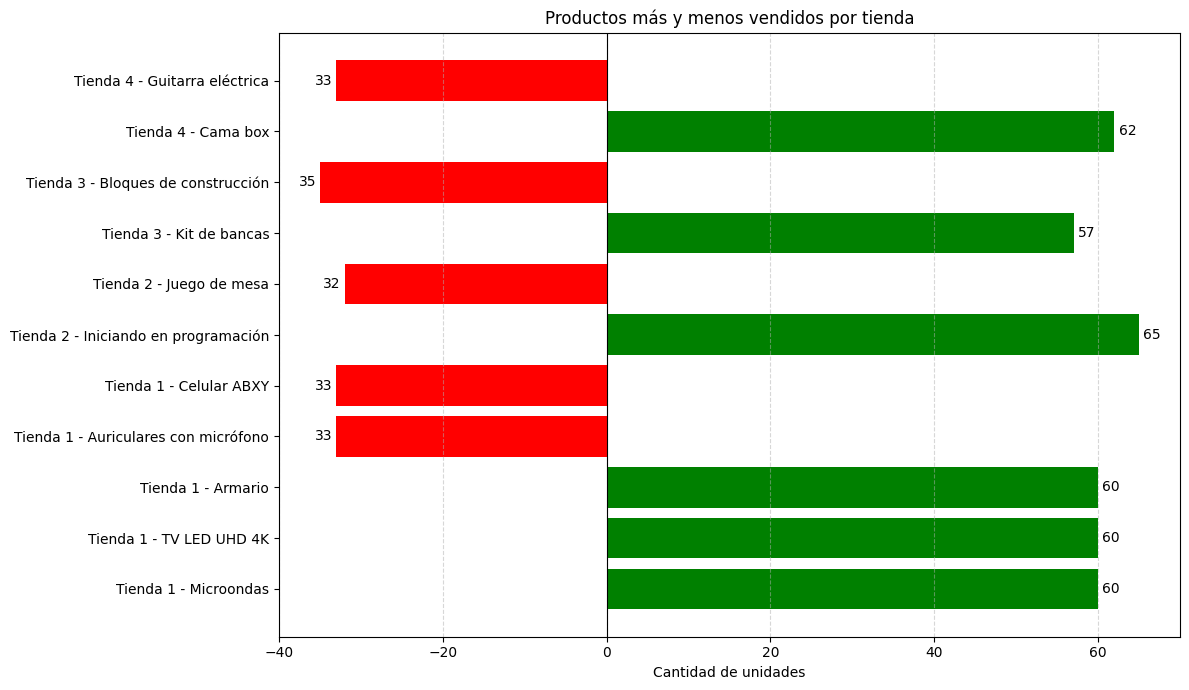

In [ ]:
def productos_vendidos(nombre_tienda,df):
  # Contar la cantidad de veces que se vendió cada producto
  productos = df['Producto'].value_counts()

  # Obtener los productos más vendidos
  vendido_Mas = [(producto,cantidad) for producto, cantidad in productos.items() if cantidad == productos.max()]

  # Obtener el o los productos menos vendidos (puede haber empate)
  vendido_Menos = [(producto,cantidad) for producto, cantidad in productos.items() if cantidad == productos.min()]

  print(f'\nProductos de la {nombre_tienda}:')
  print(f'Producto más vendido: {vendido_Mas}')
  print(f'Producto menos vendido: {vendido_Menos}')
  return vendido_Mas, vendido_Menos

#Obtener los resultados
producto_situacion = [
    productos_vendidos('Tienda 1', tienda1),
    productos_vendidos('Tienda 2', tienda2),
    productos_vendidos('Tienda 3', tienda3),
    productos_vendidos('Tienda 4', tienda4)
]

# Lista de nombres de tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Construir lista de filas para DataFrame
datos = []
for tienda, (mas_vendidos, menos_vendidos) in zip(tiendas, producto_situacion):
    for producto, cantidad in mas_vendidos:
        datos.append({
            'Tienda': tienda,
            'Producto': producto,
            'Cantidad': cantidad,
            'Tipo': 'Más vendido'
        })
    for producto, cantidad in menos_vendidos:
        datos.append({
            'Tienda': tienda,
            'Producto': producto,
            'Cantidad': -cantidad,
            'Tipo': 'Menos vendido'
        })

df = pd.DataFrame(datos)
df['Etiqueta'] = df['Tienda'] + ' - ' + df['Producto']

# Crear gráfico de barras horizontales
plt.figure(figsize=(12, 7))
colors = df['Tipo'].map({'Más vendido': 'green', 'Menos vendido': 'red'})
bars = plt.barh(df['Etiqueta'], df['Cantidad'], color=colors)

# Agregar texto en las barras
for bar in bars:
    ancho = bar.get_width()
    plt.text(ancho + (0.5 if ancho > 0 else -0.5),
             bar.get_y() + bar.get_height() / 2,
             f'{abs(int(ancho))}',
             ha='left' if ancho > 0 else 'right',
             va='center')

plt.axvline(0, color='black', linewidth=0.8)
plt.title('Productos más y menos vendidos por tienda')
plt.xlabel('Cantidad de unidades')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

El promedio de costo de envio en la Tienda 1 es: $26,018.61
El promedio de costo de envio en la Tienda 2 es: $25,216.24
El promedio de costo de envio en la Tienda 3 es: $24,805.68
El promedio de costo de envio en la Tienda 4 es: $23,459.46


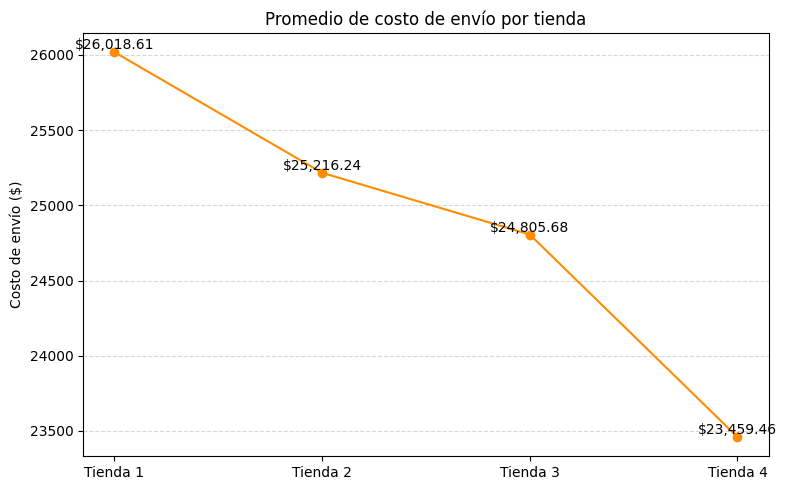

In [ ]:
def promedio_Calificacion(nombre_tienda,df):
  # Se calcula el promedio de los costos de envío
  promedio_Costo_Envio = float(df['Costo de envío'].sum()/len(df['Costo de envío']))
  print(f'El promedio de costo de envio en la {nombre_tienda} es: ${promedio_Costo_Envio:,.2f}')
  return promedio_Costo_Envio

#Obtener los resultados
promedios_envio = [
    promedio_Calificacion('Tienda 1', tienda1),
    promedio_Calificacion('Tienda 2', tienda2),
    promedio_Calificacion('Tienda 3', tienda3),
    promedio_Calificacion('Tienda 4', tienda4)
]

# Gráfico de línea con puntos
plt.figure(figsize=(8, 5))
plt.plot(tiendas, promedios_envio, marker='o', color='darkorange', linestyle='-')
for i, valor in enumerate(promedios_envio):
    plt.text(i, valor, f'${valor:,.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Promedio de costo de envío por tienda')
plt.ylabel('Costo de envío ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 6. Análisis del desempeño general de las tiendas de Alura Store

En esta sección se analiza el rendimiento de las cuatro tiendas de la cadena **Alura Store** con el objetivo de identificar qué tienda presenta el menor desempeño general.

---

#### **1. Facturación total**

El primer aspecto evaluado es la facturación total de cada tienda. A través del tratamiento de datos con Python, se obtuvieron los siguientes resultados:

- **Tienda 1**: \$1,150,880,400.00  
- **Tienda 2**: \$1,116,343,500.00  
- **Tienda 3**: \$1,098,019,600.00  
- **Tienda 4**: \$1,038,375,700.00  

La **Tienda 4** presenta la facturación más baja, lo cual representa una señal clara de bajo rendimiento. La diferencia respecto a la tienda líder, Tienda 1, es de **\$112,504,700.00**, una brecha significativa que refuerza la necesidad de evaluación.

---

#### **2. Ventas por Categoría**

A continuación, se analizaron las ventas por categoría para cada tienda, destacando aquellas con menor desempeño:

**Tienda 1**:
- Artículos para el hogar: \$12,698,400.00 (171 productos vendidos)  
- Libros: \$8,784,900.00 (173 productos vendidos)

**Tienda 2**:
- Juguetes: \$15,945,400.00 (313 productos vendidos)  
- Muebles: \$176,426,300.00 (442 productos vendidos)

**Tienda 4**:
- Electrodomésticos: \$283,260,200.00 (254 productos vendidos)  
- Electrónicos: \$409,476,100.00 (451 productos vendidos)  
- Deportes y diversión: \$33,350,100.00 (277 productos vendidos)  
- Instrumentos musicales: \$75,102,400.00 (170 productos vendidos)

Se evidencia que la **Tienda 4** tiene el peor desempeño en 4 de las 8 categorías clave, lo que refuerza su debilidad en volumen de ventas.

---

#### **3. Calificación promedio de la tienda**

El siguiente punto es la valoración promedio otorgada por los clientes:

- **Tienda 1**: 3.977  
- **Tienda 2**: 4.037  
- **Tienda 3**: 4.048  
- **Tienda 4**: 3.996  

Si bien la calificación de la **Tienda 4** no es la más baja, se encuentra por debajo del promedio general, lo que sugiere una experiencia de cliente ligeramente más débil respecto a sus competidoras.

---

#### **4. Productos menos vendidos**

En cuanto a los productos menos vendidos, la **Tienda 4** reporta como producto con menor venta a la "Guitarra eléctrica", perteneciente a la categoría de **instrumentos musicales**, una categoría que ya refleja un bajo rendimiento en esta tienda.

---

#### **5. Costo promedio de envío**

Finalmente, se compararon los costos promedio de envío:

- **Tienda 1**: \$26,018.61  
- **Tienda 2**: \$25,216.24  
- **Tienda 3**: \$24,805.68  
- **Tienda 4**: \$23,459.46  

La **Tienda 4** destaca por tener el costo de envío más bajo, lo que podría interpretarse como una ventaja logística. Sin embargo, esta fortaleza no compensa el resto de sus debilidades en facturación, ventas por categoría y calificación.


# 7. Conclusión

Con base en el análisis integral de los cinco criterios evaluados — facturación, desempeño por categoría, calificación promedio de clientes, productos menos vendidos y costo promedio de envío — se concluye que la **Tienda 4** presenta el menor desempeño general dentro de la cadena **Alura Store**.

Se recomienda **considerar su cierre y posterior venta de la Tienda 4**, destinando los recursos obtenidos al **inicio de un nuevo emprendimiento**.